## 5.

Simular 10 variables discretas $X_i$ que siguen una distribución de Poisson con
parámetro $\mu = 1.7$ y calcular su suma $Y =
\Sigma^{10}_{i=1} X_i $. Repetir este procedimiento 1000 veces para contruir un histograma de frecuencia de la variable $Y$ . Comparar el histograma con una distribución Gaussiana con parámetros adecuados. Graficar el histograma y la distribución Gaussiana. Nota: Calcular los parámetros de la Gaussiana a partir de la media y varianza de las $X_i$.


In [1]:
#librerías
import numpy as np
from scipy.stats import poisson, norm
from matplotlib import pyplot as plt 

In [2]:
#parametros

mu = 1.7
n_var = 10
n_sim = 1000

In [5]:
# genero variables de poisson

x = poisson.rvs(mu, size = [n_var, n_sim])
y = np.sum(x, axis = 0)

1000

In [8]:
# momentos de y
mu_y = np.mean(y)
std_y = np.std(y)

In [10]:
#distribución Gaussiana

x_min, x_max = (mu_y - 3 * std_y, mu_y + 3 * std_y)
x_eval = np.linspace(x_min, x_max, 100)

normal = norm.pdf(x_eval, loc = 17, scale = np.sqrt(17))


In [11]:
n, bin_edges = np.histogram(y, 10)
bin_width = bin_edges[1] - bin_edges[0]
scale_factor = bin_width*n_sim

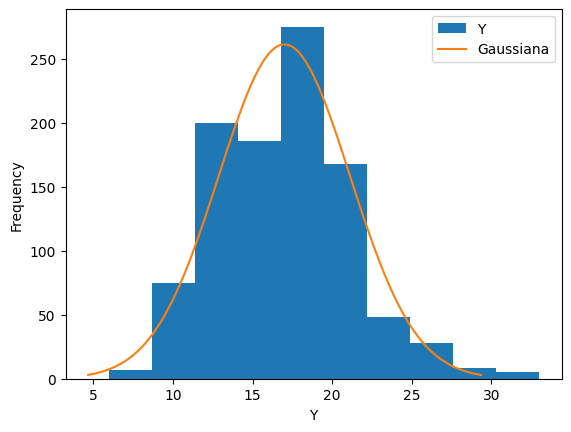

In [12]:
#plots
plt.hist(y, 10, label = "Y")
plt.plot(x_eval, normal*scale_factor, label = "Gaussiana")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
#parametros

mu = 1.7
n_var = 10
n_sim = 1000
# genero variables de poisson

x = poisson.rvs(mu, size = [n_var, n_sim])
y = np.sum(x, axis = 0)

# momentos de y
mu_y = np.mean(y)
std_y = np.std(y)
#distribución Gaussiana

x_min, x_max = (mu_y - 3 * std_y, mu_y + 3 * std_y)
x_eval = np.linspace(x_min, x_max, 100)

normal = norm.pdf(x_eval, loc = 17, scale = np.sqrt(17))

n, bin_edges = np.histogram(y, 10)
bin_width = bin_edges[1] - bin_edges[0]
scale_factor = bin_width*n_sim

#plots
plt.hist(y, 10, label = "Y")
plt.plot(x_eval, normal*scale_factor, label = "Gaussiana")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.legend()
plt.show()
######################################################################################
############################################################################################

Mostramos que la suma de dos variables chi-cuadrado con 
 y 
 grados de libertad es una variable chi-cuadrado con 
 grados de libertad

import numpy as np
rng = np.random.default_rng(seed=6870)
Grados de libertad de la primera variable chi-cuadrado

ndof1 = 5
Grados de libertad de la segunda variable chi-cuadrado

ndof2 = 7
Número de simulaciones

nsimulations = 100000
Simulamos los datos

from scipy.stats import chi2
X = chi2.rvs(df=ndof1, size=nsimulations, random_state=rng)
Y = chi2.rvs(df=ndof2, size=nsimulations, random_state=rng)
Z = X + Y
Histograma de densidad

import danatools
xmin = 0
xmax = max(Z)
density, bin_centres = danatools.histogram(Z, bins=50, range=[xmin, xmax], density=True)
PDF de la suma

ndof = ndof1 + ndof2
x_pdf = np.linspace(start=xmin, stop=xmax, num=100)
y_pdf = chi2.pdf(x_pdf, df=ndof) 
Ploteo los datos y la PDF

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("$Z$")
ax.set_ylabel("Probability density")
ax.plot(bin_centres, density, ls='None', marker='o', label="Data")
ax.plot(x_pdf, y_pdf, ls='--', label="PDF")
ax.set_ylim(bottom=0)
ax.legend()